In Global Country Information Dataset 2023, this comprehensive dataset provides descriptive information on countries worldwide. Focusing on Co2-Emissions and analyzing this data with other provided information, we plan to forsee trends and possible influences caused by other factors. We will procure insights by performing Data Cleaning and EDA(Exploratary Data Analysis) to draw conclusions to this project.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading in data to pandas dataframe
df = pd.read_csv('world-data-2023.csv')
df.head()

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...                           56.90%   
2            Algiers       150,006  ...                           28.10%   
3   Andorra la Vella           469  ...                           36.40%   
4             Luanda        34,693  ...                           33.40%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.168331  
2            11.70%       31,510,100  28.033886   1.659626  
3               NaN           67,873  42.506285   1.521801  
4             6.89%       21,061,025 -11.202692  17.873887  

[5 rows x 35 columns]

In [3]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
# Removing rows of same value
df = df.drop_duplicates()

In [5]:
# Filtering possible needed information
df = df[['Country','Agricultural Land( %)', 'Birth Rate', 'Land Area(Km2)','Co2-Emissions',
    'Fertility Rate', 'Forested Area (%)','Gasoline Price', 'GDP',
    'Life expectancy','Minimum wage', 'Out of pocket health expenditure',
    'Population','Tax revenue (%)','Unemployment rate', 'Urban_population']]

In [6]:
df.dtypes
# df.select_dtypes(include='object')

Country                              object
Agricultural Land( %)                object
Birth Rate                          float64
Land Area(Km2)                       object
Co2-Emissions                        object
Fertility Rate                      float64
Forested Area (%)                    object
Gasoline Price                       object
GDP                                  object
Life expectancy                     float64
Minimum wage                         object
Out of pocket health expenditure     object
Population                           object
Tax revenue (%)                      object
Unemployment rate                    object
Urban_population                     object
dtype: object

In [7]:
# Renaming for clarification
df.rename(columns={'Agricultural Land( %)':'Agricultural Land(%)',
                   'Co2-Emissions':'Co2_Emissions(tons)',
                   'Fertility Rate':'Fertility',
                   'Life expectancy':'Life expectancy(years)',
                   'Out of pocket health expenditure':'Out of pocket health expense(%)',
                   'Unemployment rate':'Unemployment %'},inplace=True)

In [8]:
df.isna().sum()

Country                             0
Agricultural Land(%)                7
Birth Rate                          6
Land Area(Km2)                      1
Co2_Emissions(tons)                 7
Fertility                           7
Forested Area (%)                   7
Gasoline Price                     20
GDP                                 2
Life expectancy(years)              8
Minimum wage                       45
Out of pocket health expense(%)     7
Population                          1
Tax revenue (%)                    26
Unemployment %                     19
Urban_population                    5
dtype: int64

In [10]:
# Used when replacing one column at a time
# df['Agricultural Land( %)'] = df['Agricultural Land( %)'].str.rstrip('%')

In [11]:
columns_replaced = ['Agricultural Land(%)', 'Land Area(Km2)', 'Forested Area (%)',
                    'Co2_Emissions(tons)','Gasoline Price','GDP','Minimum wage',
                    'Out of pocket health expense(%)','Population','Tax revenue (%)',
                    'Unemployment %','Urban_population']
# Removing signs/symbols
for col in columns_replaced:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '').str.replace('$', '').str.replace(',', '')
# Convert to calculatable values        
for col in columns_replaced:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.dtypes

Country                             object
Agricultural Land(%)               float64
Birth Rate                         float64
Land Area(Km2)                     float64
Co2_Emissions(tons)                float64
Fertility                          float64
Forested Area (%)                  float64
Gasoline Price                     float64
GDP                                float64
Life expectancy(years)             float64
Minimum wage                       float64
Out of pocket health expense(%)    float64
Population                         float64
Tax revenue (%)                    float64
Unemployment %                     float64
Urban_population                   float64
dtype: object

In [13]:
# Creating categories as columns
df[['Developing','Developed']] = 0

In [14]:
developed_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hong Kong (China)",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Latvia",
    "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Netherlands",
    "New Zealand", "Norway", "Poland", "Portugal", "Singapore", "Slovakia",
    "Slovenia", "South Korea", "Spain", "Sweden", "Switzerland", "Taiwan",
    "United Arab Emirates", "United Kingdom", "United States"
]
# Categorize countries for trends
def assign_developing_developed(row):
    if row['Country'] in developed_countries:
        row['Developed'] = 1
    else:
        row['Developing'] = 1
    return row

df = df.apply(assign_developing_developed, axis=1)

In [16]:
df['Developing'].value_counts()

Developing
1    158
0     37
Name: count, dtype: int64

In [17]:
# Convert integers to Int type
columns_to_convert = [
    'Land Area(Km2)', 'Co2_Emissions(tons)', 'GDP', 'Population', 'Urban_population'
]

for col in columns_to_convert:
    df[col] = df[col].astype(float).astype(pd.Int64Dtype())

In [18]:
df.dtypes

Country                             object
Agricultural Land(%)               float64
Birth Rate                         float64
Land Area(Km2)                       Int64
Co2_Emissions(tons)                  Int64
Fertility                          float64
Forested Area (%)                  float64
Gasoline Price                     float64
GDP                                  Int64
Life expectancy(years)             float64
Minimum wage                       float64
Out of pocket health expense(%)    float64
Population                           Int64
Tax revenue (%)                    float64
Unemployment %                     float64
Urban_population                     Int64
Developing                           int64
Developed                            int64
dtype: object

In [19]:
# df.loc[df['Agricultural Land(%)'].isna()]

In [20]:
# Removing rows with all null
df.dropna(how='all')

Country  Agricultural Land(%)  Birth Rate  Land Area(Km2)  \
0    Afghanistan                  58.1       32.49          652230   
1        Albania                  43.1       11.78           28748   
2        Algeria                  17.4       24.28         2381741   
3        Andorra                  40.0        7.20             468   
4         Angola                  47.5       40.73         1246700   
..           ...                   ...         ...             ...   
190    Venezuela                  24.5       17.88          912050   
191      Vietnam                  39.3       16.75          331210   
192        Yemen                  44.6       30.45          527968   
193       Zambia                  32.1       36.19          752618   
194     Zimbabwe                  41.9       30.68          390757   

     Co2_Emissions(tons)  Fertility  Forested Area (%)  Gasoline Price  \
0                   8672       4.47                2.1            0.70   
1                   4536       1.62               28.1            1.36   
2                 150006       3.02                0.8            0.28   
3                    469       1.27               34.0            1.51   
4                  34693       5.52               46.3            0.97   
..                   ...        ...                ...             ...   
190               164175       2.27               52.7            0.00   
191               192668       2.05               48.1            0.80   
192                10609       3.79                1.0            0.92   
193                 5141       4.63               65.2            1.40   
194                10983       3.62               35.5            1.34   

              GDP  Life expectancy(years)  Minimum wage  \
0     19101353833                    64.5          0.43   
1     15278077447                    78.5          1.12   
2    169988236398                    76.7          0.95   
3      3154057987                     NaN          6.63   
4     94635415870                    60.8          0.71   
..            ...                     ...           ...   
190  482359318768                    72.1          0.01   
191  261921244843                    75.3          0.73   
192   26914402224                    66.1           NaN   
193   23064722446                    63.5          0.24   
194   21440758800                    61.2           NaN   

     Out of pocket health expense(%)  Population  Tax revenue (%)  \
0                               78.4    38041754              9.3   
1                               56.9     2854191             18.6   
2                               28.1    43053054             37.2   
3                               36.4       77142              NaN   
4                               33.4    31825295              9.2   
..                               ...         ...              ...   
190                             45.8    28515829              NaN   
191                             43.5    96462106             19.1   
192                             81.0    29161922              NaN   
193                             27.5    17861030             16.2   
194                             25.8    14645468             20.7   

     Unemployment %  Urban_population  Developing  Developed  
0             11.12           9797273           1          0  
1             12.33           1747593           1          0  
2             11.70          31510100           1          0  
3               NaN             67873           1          0  
4              6.89          21061025           1          0  
..              ...               ...         ...        ...  
190            8.80          25162368           1          0  
191            2.01          35332140           1          0  
192           12.91          10869523           1          0  
193           11.43           7871713           1          0  
194            4.95           4717305           

In [21]:
df[df[['Co2_Emissions(tons)']].isna().all(axis=1)]

Country  Agricultural Land(%)  Birth Rate  \
56                         Eswatini                   NaN         NaN   
73                     Vatican City                   NaN         NaN   
113                          Monaco                   NaN         5.9   
120                           Nauru                   NaN         NaN   
128                 North Macedonia                   NaN         NaN   
133  Palestinian National Authority                   NaN         NaN   
149                      San Marino                  16.7         6.8   

     Land Area(Km2)  Co2_Emissions(tons)  Fertility  Forested Area (%)  \
56            17364                 <NA>        NaN                NaN   
73                0                 <NA>        NaN                NaN   
113               2                 <NA>        NaN                NaN   
120              21                 <NA>        NaN                NaN   
128           25713                 <NA>        NaN                NaN   
133            <NA>                 <NA>        NaN                NaN   
149              61                 <NA>       1.26                0.0   

     Gasoline Price          GDP  Life expectancy(years)  Minimum wage  \
56              NaN   3791304348                     NaN           NaN   
73              NaN         <NA>                     NaN           NaN   
113             2.0   7184844193                     NaN         11.72   
120             NaN    133000000                     NaN           NaN   
128             NaN  10220781069                     NaN           NaN   
133             NaN         <NA>                     NaN           NaN   
149             NaN   1637931034                    85.4           NaN   

     Out of pocket health expense(%)  Population  Tax revenue (%)  \
56                              11.3     1093238             28.6   
73                               NaN         836              NaN   
113                              6.1       38964              NaN   
120                              NaN       10084              NaN   
128                             35.6     1836713              NaN   
133                              NaN        <NA>              NaN   
149                             18.3       33860             18.1   

     Unemployment %  Urban_population  Developing  Developed  
56              NaN              <NA>           1          0  
73              NaN              <NA>           1          0  
113             NaN             38964           1          0  
120             NaN              <NA>           1          0  
128             NaN              <NA>           1          0  
133             NaN              <NA>           1          0  
149             NaN             32969           1          0

In [22]:
# Removing null values in Co2 column since this is Co2 focused
df.dropna(subset=("Co2_Emissions(tons)"),inplace=True)

In [23]:
df.isna().sum()

Country                             0
Agricultural Land(%)                1
Birth Rate                          1
Land Area(Km2)                      0
Co2_Emissions(tons)                 0
Fertility                           1
Forested Area (%)                   1
Gasoline Price                     14
GDP                                 0
Life expectancy(years)              2
Minimum wage                       39
Out of pocket health expense(%)     4
Population                          0
Tax revenue (%)                    21
Unemployment %                     12
Urban_population                    0
Developing                          0
Developed                           0
dtype: int64

In [24]:
df.reset_index(drop=True)

Country  Agricultural Land(%)  Birth Rate  Land Area(Km2)  \
0    Afghanistan                  58.1       32.49          652230   
1        Albania                  43.1       11.78           28748   
2        Algeria                  17.4       24.28         2381741   
3        Andorra                  40.0        7.20             468   
4         Angola                  47.5       40.73         1246700   
..           ...                   ...         ...             ...   
183    Venezuela                  24.5       17.88          912050   
184      Vietnam                  39.3       16.75          331210   
185        Yemen                  44.6       30.45          527968   
186       Zambia                  32.1       36.19          752618   
187     Zimbabwe                  41.9       30.68          390757   

     Co2_Emissions(tons)  Fertility  Forested Area (%)  Gasoline Price  \
0                   8672       4.47                2.1            0.70   
1                   4536       1.62               28.1            1.36   
2                 150006       3.02                0.8            0.28   
3                    469       1.27               34.0            1.51   
4                  34693       5.52               46.3            0.97   
..                   ...        ...                ...             ...   
183               164175       2.27               52.7            0.00   
184               192668       2.05               48.1            0.80   
185                10609       3.79                1.0            0.92   
186                 5141       4.63               65.2            1.40   
187                10983       3.62               35.5            1.34   

              GDP  Life expectancy(years)  Minimum wage  \
0     19101353833                    64.5          0.43   
1     15278077447                    78.5          1.12   
2    169988236398                    76.7          0.95   
3      3154057987                     NaN          6.63   
4     94635415870                    60.8          0.71   
..            ...                     ...           ...   
183  482359318768                    72.1          0.01   
184  261921244843                    75.3          0.73   
185   26914402224                    66.1           NaN   
186   23064722446                    63.5          0.24   
187   21440758800                    61.2           NaN   

     Out of pocket health expense(%)  Population  Tax revenue (%)  \
0                               78.4    38041754              9.3   
1                               56.9     2854191             18.6   
2                               28.1    43053054             37.2   
3                               36.4       77142              NaN   
4                               33.4    31825295              9.2   
..                               ...         ...              ...   
183                             45.8    28515829              NaN   
184                             43.5    96462106             19.1   
185                             81.0    29161922              NaN   
186                             27.5    17861030             16.2   
187                             25.8    14645468             20.7   

     Unemployment %  Urban_population  Developing  Developed  
0             11.12           9797273           1          0  
1             12.33           1747593           1          0  
2             11.70          31510100           1          0  
3               NaN             67873           1          0  
4              6.89          21061025           1          0  
..              ...               ...         ...        ...  
183            8.80          25162368           1          0  
184            2.01          35332140           1          0  
185           12.91          10869523           1          0  
186           11.43           7871713           1          0  
187            4.95           4717305           

In [25]:
df.fillna('NotGiven')

Country Agricultural Land(%) Birth Rate  Land Area(Km2)  \
0    Afghanistan                 58.1      32.49          652230   
1        Albania                 43.1      11.78           28748   
2        Algeria                 17.4      24.28         2381741   
3        Andorra                 40.0        7.2             468   
4         Angola                 47.5      40.73         1246700   
..           ...                  ...        ...             ...   
190    Venezuela                 24.5      17.88          912050   
191      Vietnam                 39.3      16.75          331210   
192        Yemen                 44.6      30.45          527968   
193       Zambia                 32.1      36.19          752618   
194     Zimbabwe                 41.9      30.68          390757   

     Co2_Emissions(tons) Fertility Forested Area (%) Gasoline Price  \
0                   8672      4.47               2.1            0.7   
1                   4536      1.62              28.1           1.36   
2                 150006      3.02               0.8           0.28   
3                    469      1.27              34.0           1.51   
4                  34693      5.52              46.3           0.97   
..                   ...       ...               ...            ...   
190               164175      2.27              52.7            0.0   
191               192668      2.05              48.1            0.8   
192                10609      3.79               1.0           0.92   
193                 5141      4.63              65.2            1.4   
194                10983      3.62              35.5           1.34   

              GDP Life expectancy(years) Minimum wage  \
0     19101353833                   64.5         0.43   
1     15278077447                   78.5         1.12   
2    169988236398                   76.7         0.95   
3      3154057987               NotGiven         6.63   
4     94635415870                   60.8         0.71   
..            ...                    ...          ...   
190  482359318768                   72.1         0.01   
191  261921244843                   75.3         0.73   
192   26914402224                   66.1     NotGiven   
193   23064722446                   63.5         0.24   
194   21440758800                   61.2     NotGiven   

    Out of pocket health expense(%)  Population Tax revenue (%)  \
0                              78.4    38041754             9.3   
1                              56.9     2854191            18.6   
2                              28.1    43053054            37.2   
3                              36.4       77142        NotGiven   
4                              33.4    31825295             9.2   
..                              ...         ...             ...   
190                            45.8    28515829        NotGiven   
191                            43.5    96462106            19.1   
192                            81.0    29161922        NotGiven   
193                            27.5    17861030            16.2   
194                            25.8    14645468            20.7   

    Unemployment %  Urban_population  Developing  Developed  
0            11.12           9797273           1          0  
1            12.33           1747593           1          0  
2             11.7          31510100           1          0  
3         NotGiven             67873           1          0  
4             6.89          21061025           1          0  
..             ...               ...         ...        ...  
190            8.8          25162368           1          0  
191           2.01          35332140           1          0  
192          12.91          10869523           1          0  
193          11.43           7871713           1          0  
194           4.95           4717305           1          0  

[188 rows x 18 columns]

In [26]:
# Dropping Gas and wage since they are in all different currencies
df = df.drop(columns=['Gasoline Price','Minimum wage'])

In [27]:
# Check to see if there are categorical column to see trends
df.nunique()

Country                            188
Agricultural Land(%)               167
Birth Rate                         168
Land Area(Km2)                     188
Co2_Emissions(tons)                184
Fertility                          139
Forested Area (%)                  161
GDP                                188
Life expectancy(years)             133
Out of pocket health expense(%)    157
Population                         188
Tax revenue (%)                    118
Unemployment %                     164
Urban_population                   188
Developing                           2
Developed                            2
dtype: int64

In [28]:
df.sort_values(by="Population", ascending=False).head(10)

Country  Agricultural Land(%)  Birth Rate  Land Area(Km2)  \
36           China                  56.2       10.90         9596960   
77           India                  60.4       17.86         3287263   
186  United States                  44.4       11.60         9833517   
78       Indonesia                  31.5       18.07         1904569   
131       Pakistan                  47.8       28.25          796095   
23          Brazil                  33.9       13.92         8515770   
126        Nigeria                  77.7       37.91          923768   
13      Bangladesh                  70.6       18.18          148460   
143         Russia                  13.3       11.50        17098240   
85           Japan                  12.3        7.40          377944   

     Co2_Emissions(tons)  Fertility  Forested Area (%)             GDP  \
36               9893038       1.69               22.4  19910000000000   
77               2407672       2.22               23.8   2611000000000   
186              5006302       1.73               33.9  21427700000000   
78                563325       2.31               49.9   1119190780753   
131               201150       3.51                1.9    304400000000   
23                462299       1.73               58.9   1839758040766   
126               120369       5.39                7.2    448120428859   
13                 84246       2.04               11.0    302571254131   
143              1732027       1.57               49.8   1699876578871   
85               1135886       1.42               68.5   5081769542380   

     Life expectancy(years)  Out of pocket health expense(%)  Population  \
36                     77.0                             32.4  1397715000   
77                     69.4                             65.1  1366417754   
186                    78.5                             11.1   328239523   
78                     71.5                             48.3   270203917   
131                    67.1                             66.5   216565318   
23                     75.7                             28.3   212559417   
126                    54.3                             72.2   200963599   
13                     72.3                             71.8   167310838   
143                    72.7                             36.4   144373535   
85                     84.2                             13.1   126226568   

     Tax revenue (%)  Unemployment %  Urban_population  Developing  Developed  
36               9.4            4.32         842933962           1          0  
77              11.2            5.36         471031528           1          0  
186              9.6           14.70         270663028           0          1  
78              10.2            4.69         151509724           1          0  
131              9.2            4.45          79927762           1          0  
23              14.2           12.08         183241641           1          0  
126              1.5            8.10         102806948           1          0  
13               8.8            4.19          60987417           1          0  
143             11.4            4.59         107683889           1          0  
85              11.9            2.29         115782416           0          1

In [49]:
# Dropping Country to see descriptive correlation
df_numeric = df.drop(columns=['Country'])
df_numeric.corr()

Agricultural Land(%)  Birth Rate  \
Agricultural Land(%)                         1.000000    0.193270   
Birth Rate                                   0.193270    1.000000   
Land Area(Km2)                              -0.033305   -0.072539   
Co2_Emissions(tons)                          0.061191   -0.155796   
Fertility                                    0.175412    0.981066   
Forested Area (%)                           -0.445452   -0.084999   
GDP                                          0.050764   -0.186524   
Life expectancy(years)                      -0.236685   -0.873455   
Out of pocket health expense(%)              0.131524    0.243634   
Population                                   0.116338   -0.058016   
Tax revenue (%)                             -0.054857   -0.375326   
Unemployment %                               0.062049   -0.043458   
Urban_population                             0.100346   -0.113291   
Developing                                   0.109435    0.511312   
Developed                                   -0.109435   -0.511312   

                                 Land Area(Km2)  Co2_Emissions(tons)  \
Agricultural Land(%)                  -0.033305             0.061191   
Birth Rate                            -0.072539            -0.155796   
Land Area(Km2)                         1.000000             0.590746   
Co2_Emissions(tons)                    0.590746             1.000000   
Fertility                             -0.067217            -0.141534   
Forested Area (%)                     -0.016995            -0.028803   
GDP                                    0.549801             0.916857   
Life expectancy(years)                 0.058904             0.121891   
Out of pocket health expense(%)       -0.020181            -0.032995   
Population                             0.445081             0.809944   
Tax revenue (%)                       -0.166022            -0.144081   
Unemployment %                         0.042922             0.006481   
Urban_population                       0.546330             0.926263   
Developing                            -0.045176            -0.073677   
Developed                              0.045176             0.073677   

                                 Fertility  Forested Area (%)       GDP  \
Agricultural Land(%)              0.175412          -0.445452  0.050764   
Birth Rate                        0.981066          -0.084999 -0.186524   
Land Area(Km2)                   -0.067217          -0.016995  0.549801   
Co2_Emissions(tons)              -0.141534          -0.028803  0.916857   
Fertility                         1.000000          -0.072129 -0.162149   
Forested Area (%)                -0.072129           1.000000 -0.002181   
GDP                              -0.162149          -0.002181  1.000000   
Life expectancy(years)           -0.848438           0.018920  0.179385   
Out of pocket health expense(%)   0.200856          -0.252542 -0.104465   
Population                       -0.057359          -0.057911  0.631774   
Tax revenue (%)                  -0.373044           0.125229 -0.116860   
Unemployment %                   -0.072601          -0.083790  0.031221   
Urban_population                 -0.106233          -0.037134  0.784151   
Developing                        0.447733          -0.027098 -0.205686   
Developed                        -0.447733           0.027098  0.205686   

                                 Life expectancy(years)  \
Agricultural Land(%)                          -0.236685   
Birth Rate                                    -0.873455   
Land Area(Km2)                                 0.058904   
Co2_Emissions(tons)                            0.121891   
Fertility                                     -0.848438   
Forested Area (%)                              0.018920   
GDP                                            0.179385   
Life expectancy(years)                         1.000000   
Out of pocket health expense(%)            

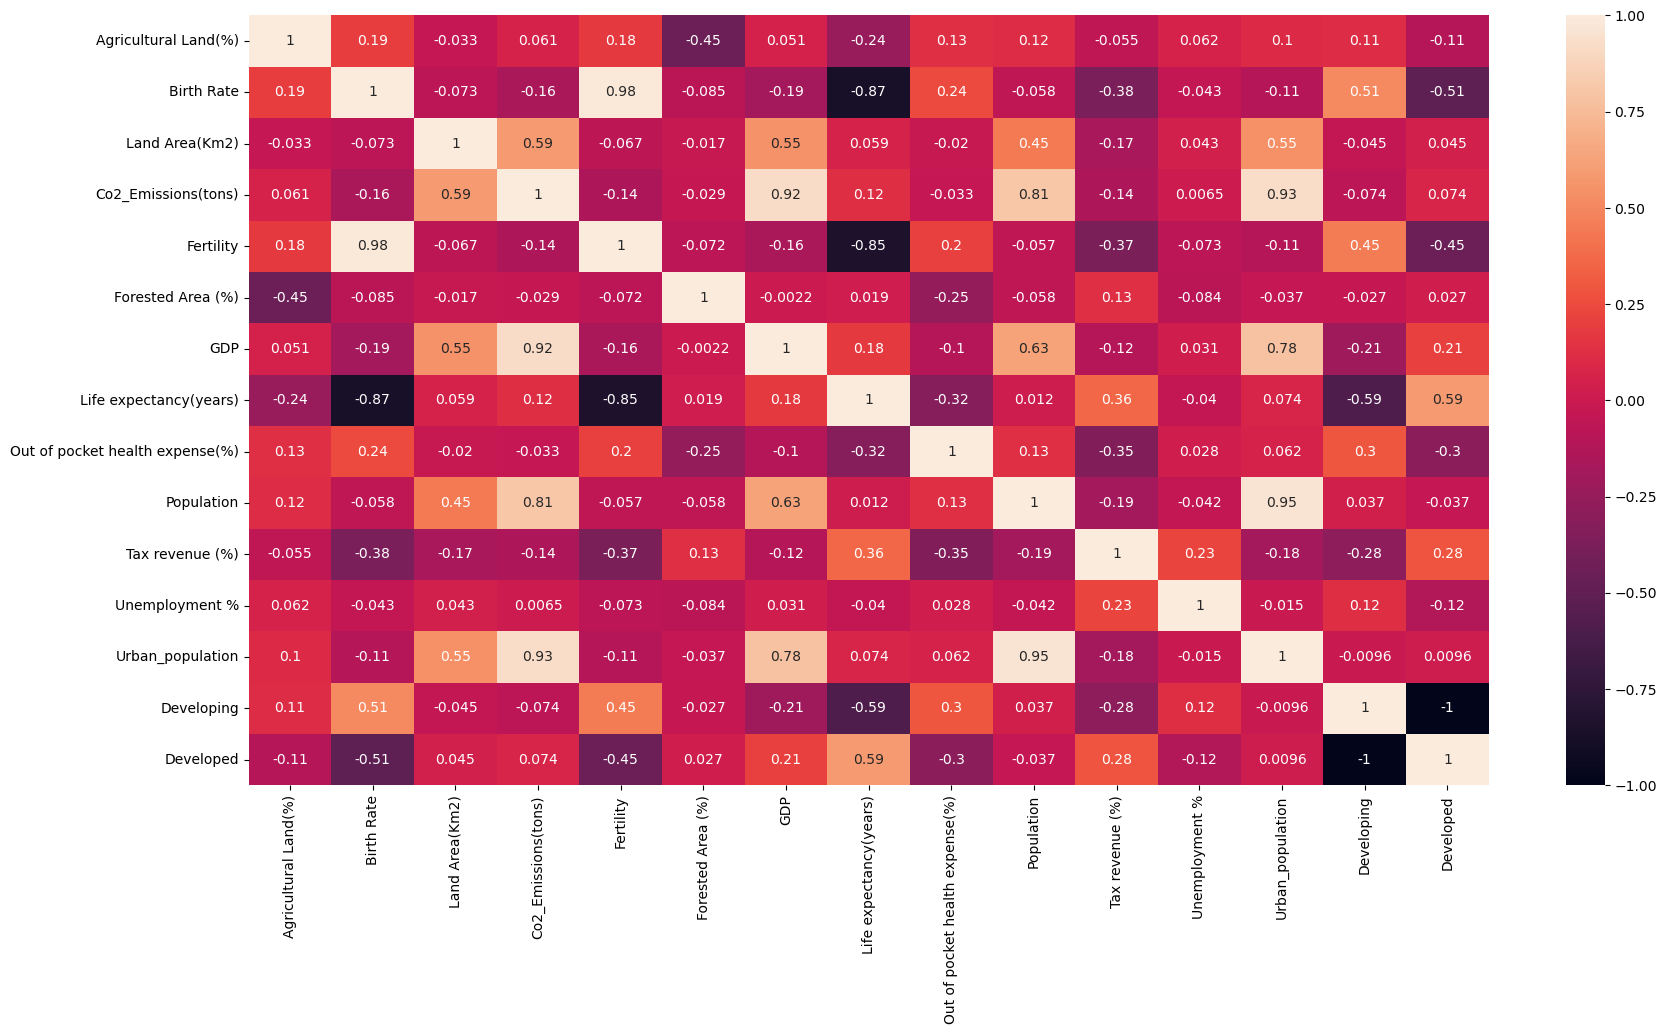

In [35]:
sns.heatmap(df_numeric.corr(), annot=True)

plt.rcParams['figure.figsize'] = (20,10)

plt.show()

In [34]:
# Checking infos on developed countries
df_numeric.groupby('Developed').mean()

Agricultural Land(%)  Birth Rate  Land Area(Km2)  \
Developed                                                     
0                     40.418000   22.869067   667952.225166   
1                     34.451351   10.204595   888734.594595   

           Co2_Emissions(tons)  Fertility  Forested Area (%)  \
Developed                                                      
0                147289.344371   2.990000          31.868000   
1                302312.594595   1.553784          33.478378   

                            GDP  Life expectancy(years)  \
Developed                                                 
0           266505854068.960266               70.034899   
1          1401425868785.243164               80.964865   

           Out of pocket health expense(%)       Population  Tax revenue (%)  \
Developed                                                                      
0                                35.752027  43346171.907285        15.466412   
1                                21.477778  29504328.783784        20.227778   

           Unemployment %  Urban_population  Developing  
Developed                                                
0                7.200357   22183499.516556         1.0  
1                5.665278   24002239.216216         0.0

Insights:
Even though Birth Rate, Fertility, Population is high on developing countries, the Co2 Emissions are two times lower, this draws insights on Co2 Emissions is not influenced by population as much, but rather GDP and Taxes.

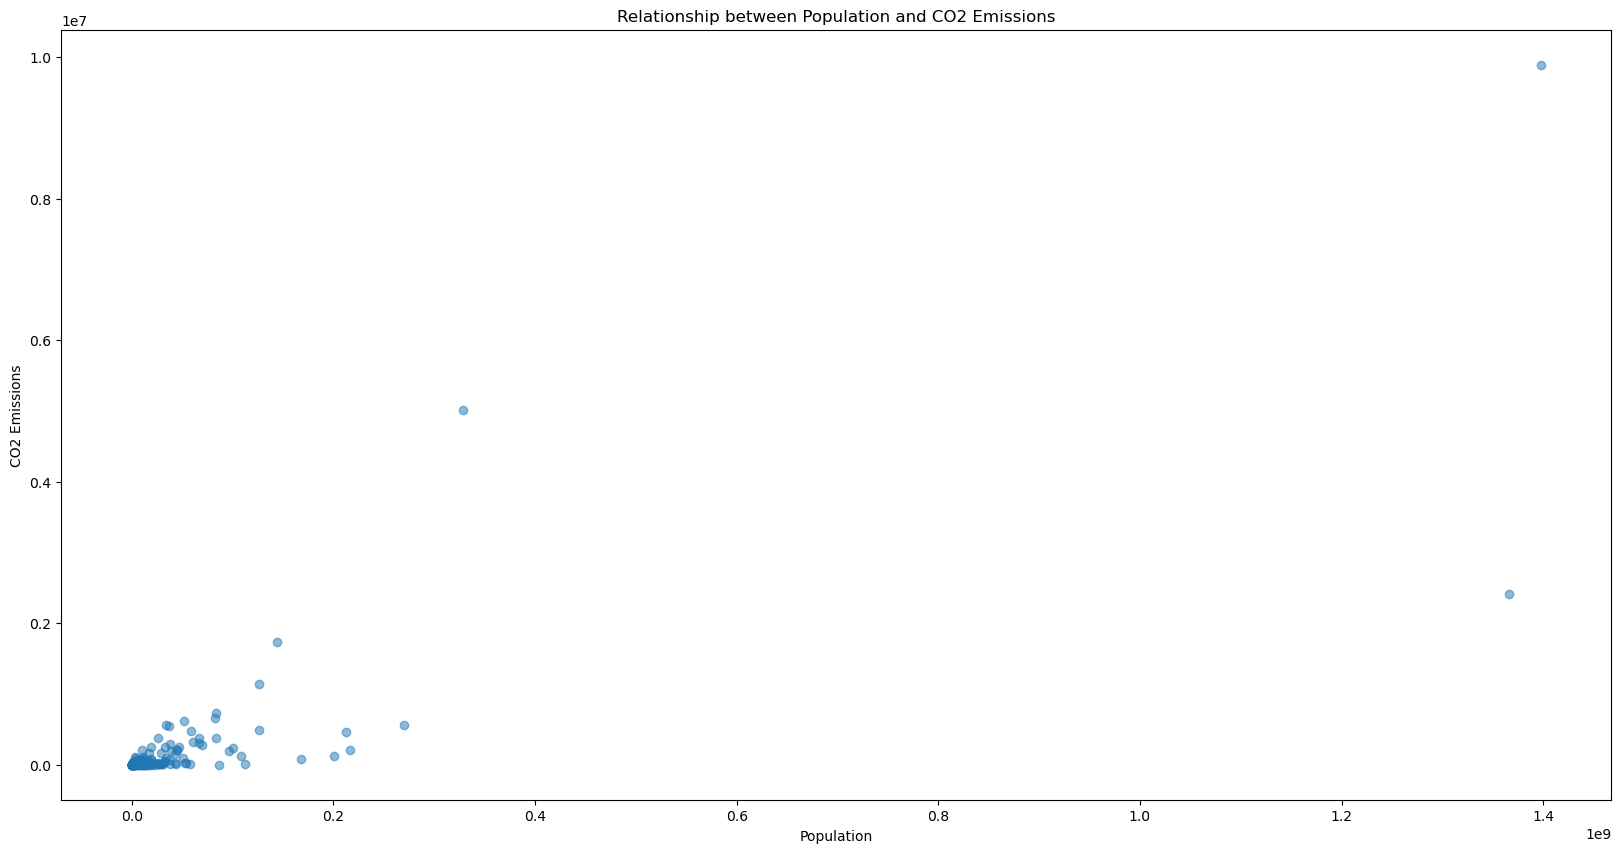

In [36]:
# Scatter plot for population vs Co2
plt.scatter(df['Population'], df['Co2_Emissions(tons)'],alpha=0.5)
plt.xlabel('Population')
plt.ylabel('CO2 Emissions')
plt.title('Relationship between Population and CO2 Emissions')
plt.show()

In [37]:
# Removing outliers and keeping the mean 50% quartile

Q1 = df['Co2_Emissions(tons)'].quantile(0.25)
Q3 = df['Co2_Emissions(tons)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Co2_Emissions(tons)'] >= lower_bound) & (df['Co2_Emissions(tons)'] <= upper_bound)]
df_no_outliers

Country  Agricultural Land(%)  Birth Rate  Land Area(Km2)  \
0    Afghanistan                  58.1       32.49          652230   
1        Albania                  43.1       11.78           28748   
2        Algeria                  17.4       24.28         2381741   
3        Andorra                  40.0        7.20             468   
4         Angola                  47.5       40.73         1246700   
..           ...                   ...         ...             ...   
188   Uzbekistan                  62.9       23.30          447400   
189      Vanuatu                  15.3       29.60           12189   
192        Yemen                  44.6       30.45          527968   
193       Zambia                  32.1       36.19          752618   
194     Zimbabwe                  41.9       30.68          390757   

     Co2_Emissions(tons)  Fertility  Forested Area (%)           GDP  \
0                   8672       4.47                2.1   19101353833   
1                   4536       1.62               28.1   15278077447   
2                 150006       3.02                0.8  169988236398   
3                    469       1.27               34.0    3154057987   
4                  34693       5.52               46.3   94635415870   
..                   ...        ...                ...           ...   
188                91811       2.42                7.5   57921286440   
189                  147       3.78               36.1     917058851   
192                10609       3.79                1.0   26914402224   
193                 5141       4.63               65.2   23064722446   
194                10983       3.62               35.5   21440758800   

     Life expectancy(years)  Out of pocket health expense(%)  Population  \
0                      64.5                             78.4    38041754   
1                      78.5                             56.9     2854191   
2                      76.7                             28.1    43053054   
3                       NaN                             36.4       77142   
4                      60.8                             33.4    31825295   
..                      ...                              ...         ...   
188                    71.6                             42.7    33580650   
189                    70.3                              8.9      299882   
192                    66.1                             81.0    29161922   
193                    63.5                             27.5    17861030   
194                    61.2                             25.8    14645468   

     Tax revenue (%)  Unemployment %  Urban_population  Developing  Developed  
0                9.3           11.12           9797273           1          0  
1               18.6           12.33           1747593           1          0  
2               37.2           11.70          31510100           1          0  
3                NaN             NaN             67873           1          0  
4                9.2            6.89          21061025           1          0  
..               ...             ...               ...         ...        ...  
188             14.8            5.92          16935729           1          0  
189             17.8            4.39             76152           1          0  
192              NaN           12.91          10869523           1          0  
193             16.2           11.43           7871713           1          0  
194             20.7            4.95           4717305           1          0  

[155 rows x 16 columns]

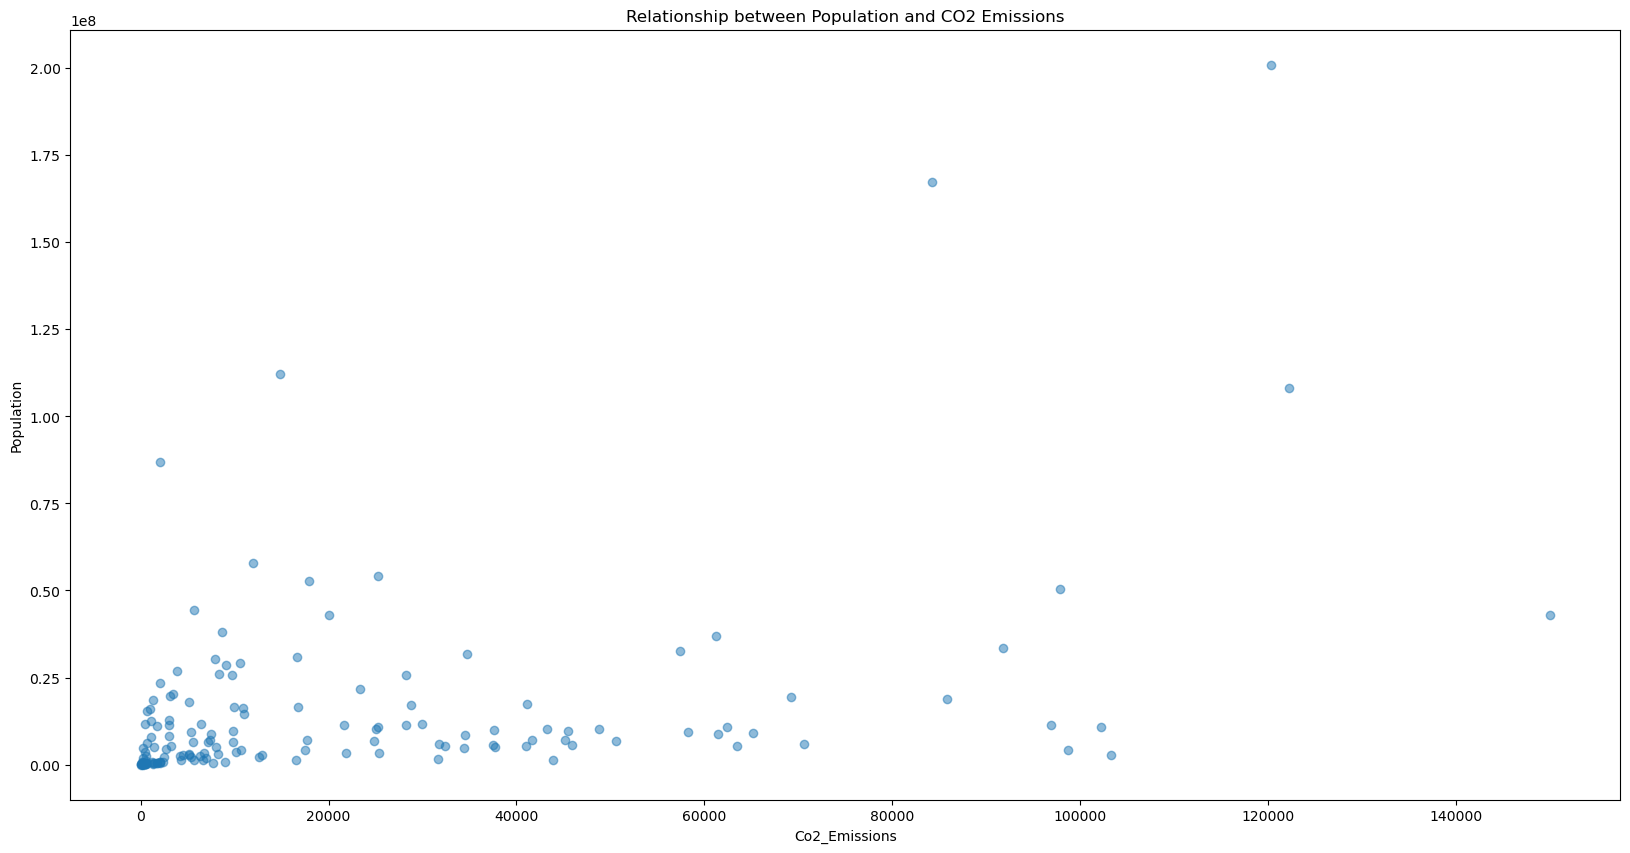

In [51]:
# Plotting based on no outliers
plt.scatter(df_no_outliers['Co2_Emissions(tons)'], df_no_outliers['Population'],alpha=0.5)
plt.xlabel('Co2_Emissions')
plt.ylabel('Population')
plt.title('Relationship between Population and CO2 Emissions')
plt.show()

Insights:
Co2 Emissions are relatively high for countries with high population and low population, but countries with low co2 emissions are relatively low in population.

In [39]:
df.columns

Index(['Country', 'Agricultural Land(%)', 'Birth Rate', 'Land Area(Km2)',
       'Co2_Emissions(tons)', 'Fertility', 'Forested Area (%)', 'GDP',
       'Life expectancy(years)', 'Out of pocket health expense(%)',
       'Population', 'Tax revenue (%)', 'Unemployment %', 'Urban_population',
       'Developing', 'Developed'],
      dtype='object')

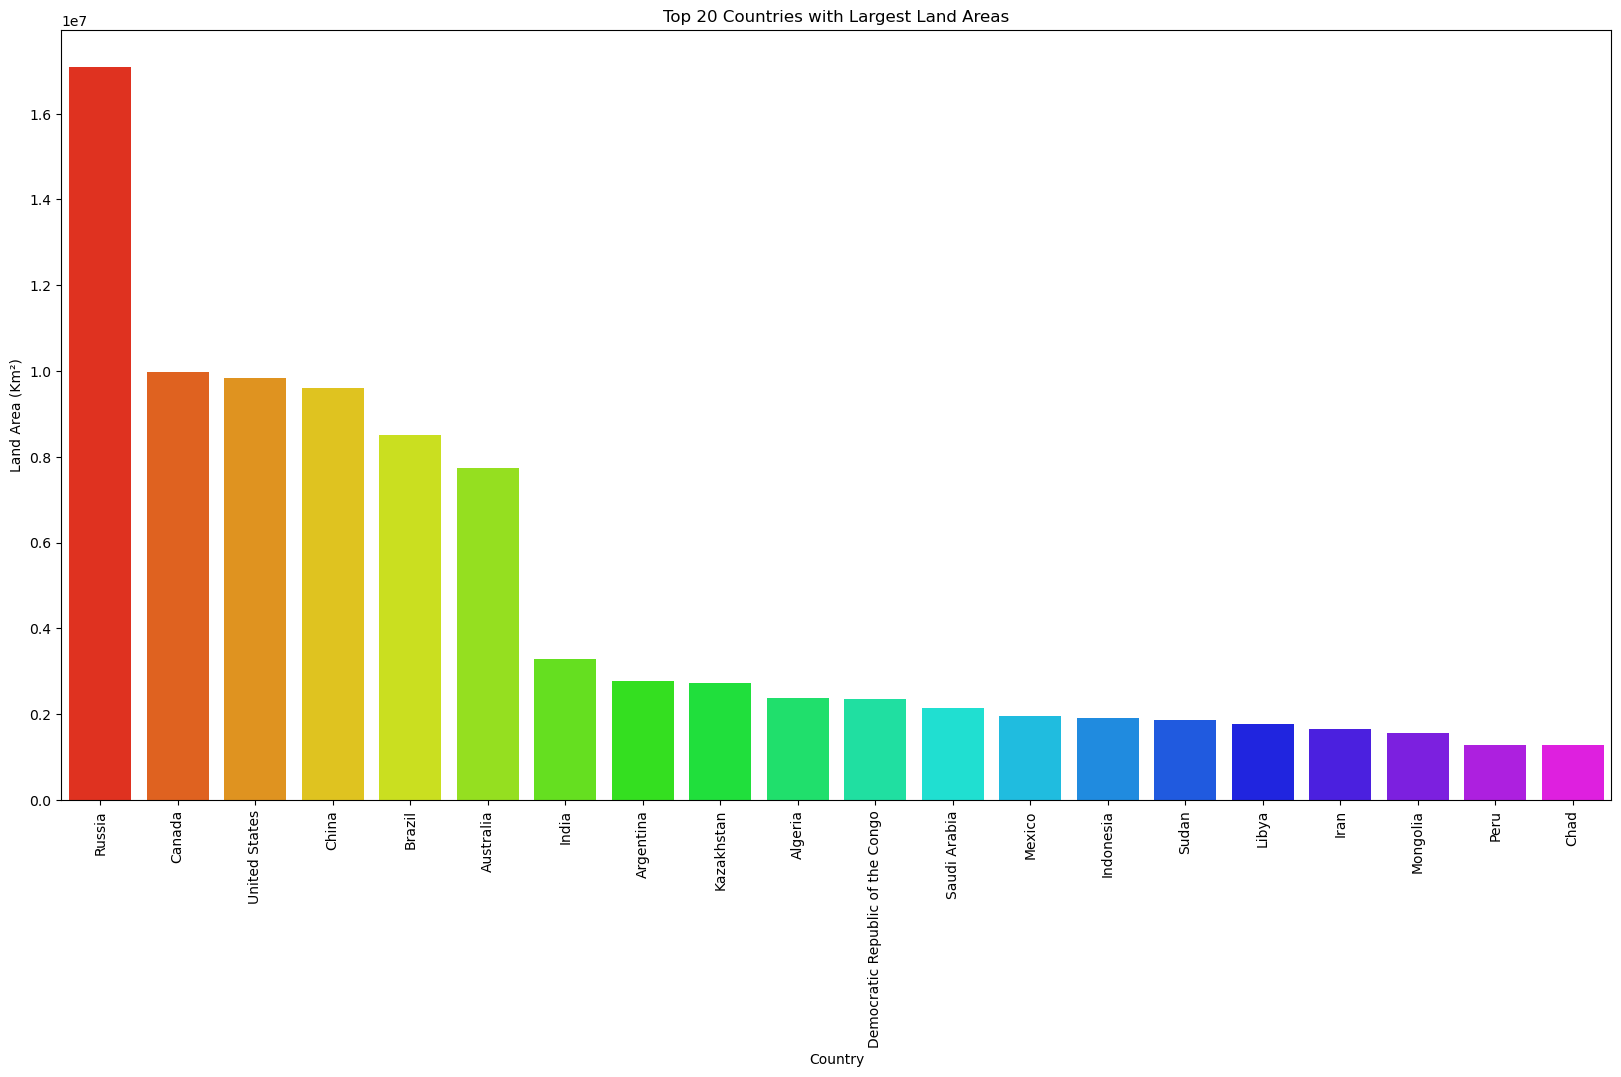

In [52]:
sorted_area = df.sort_values(by='Land Area(Km2)', ascending=False)

top_land_area_countries = sorted_area.head(20)
top_land_vs_population_countries = sorted_area.head(20)

sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='gist_rainbow')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)

plt.show()

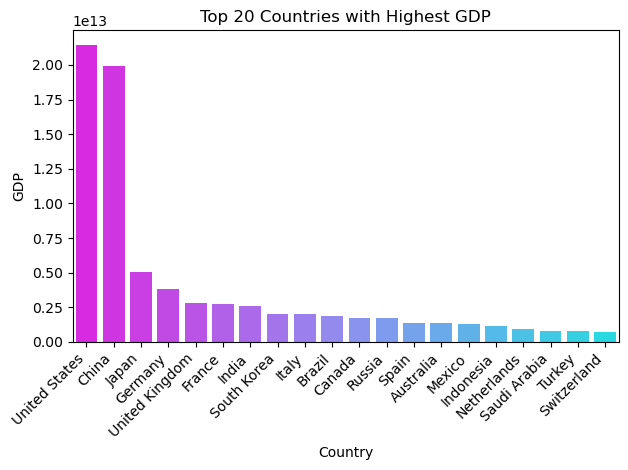

In [92]:
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

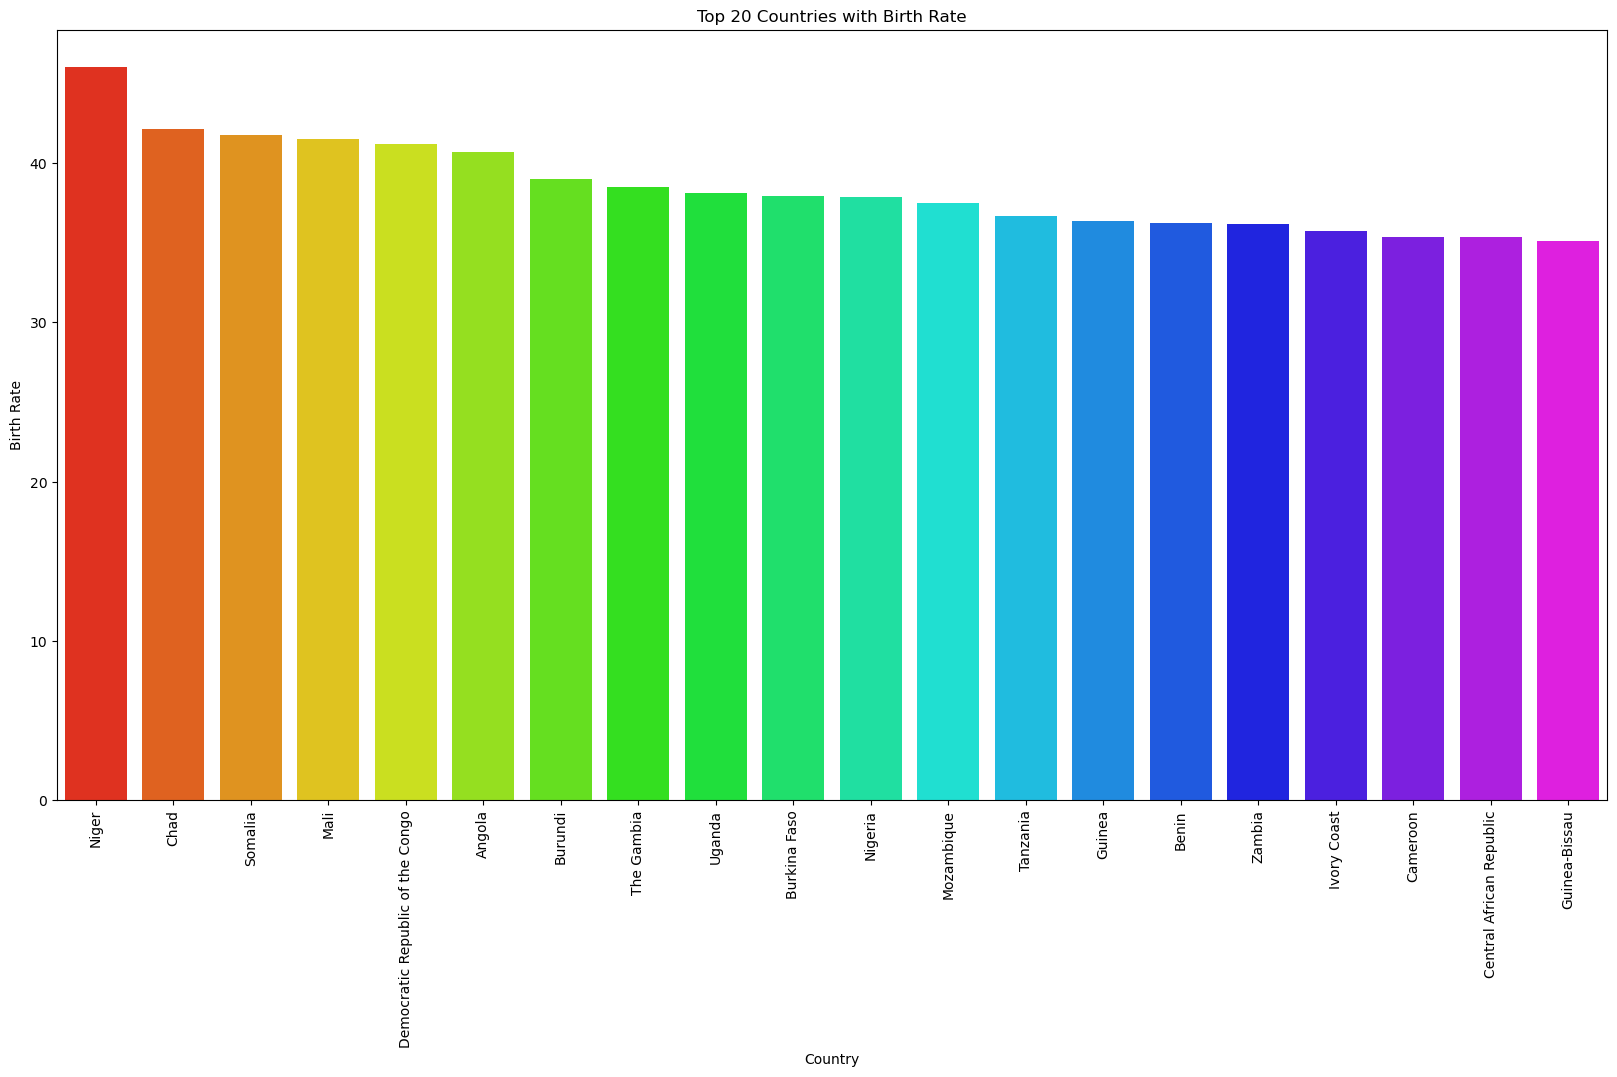

In [40]:
sorted_area = df.sort_values(by='Birth Rate', ascending=False)

top_land_area_countries = sorted_area.head(20)
top_land_vs_population_countries = sorted_area.head(20)

sns.barplot(data=top_land_area_countries, x='Country', y='Birth Rate', palette='gist_rainbow')
plt.title('Top 20 Countries with Birth Rate')
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.xticks(rotation = 90)

plt.show()

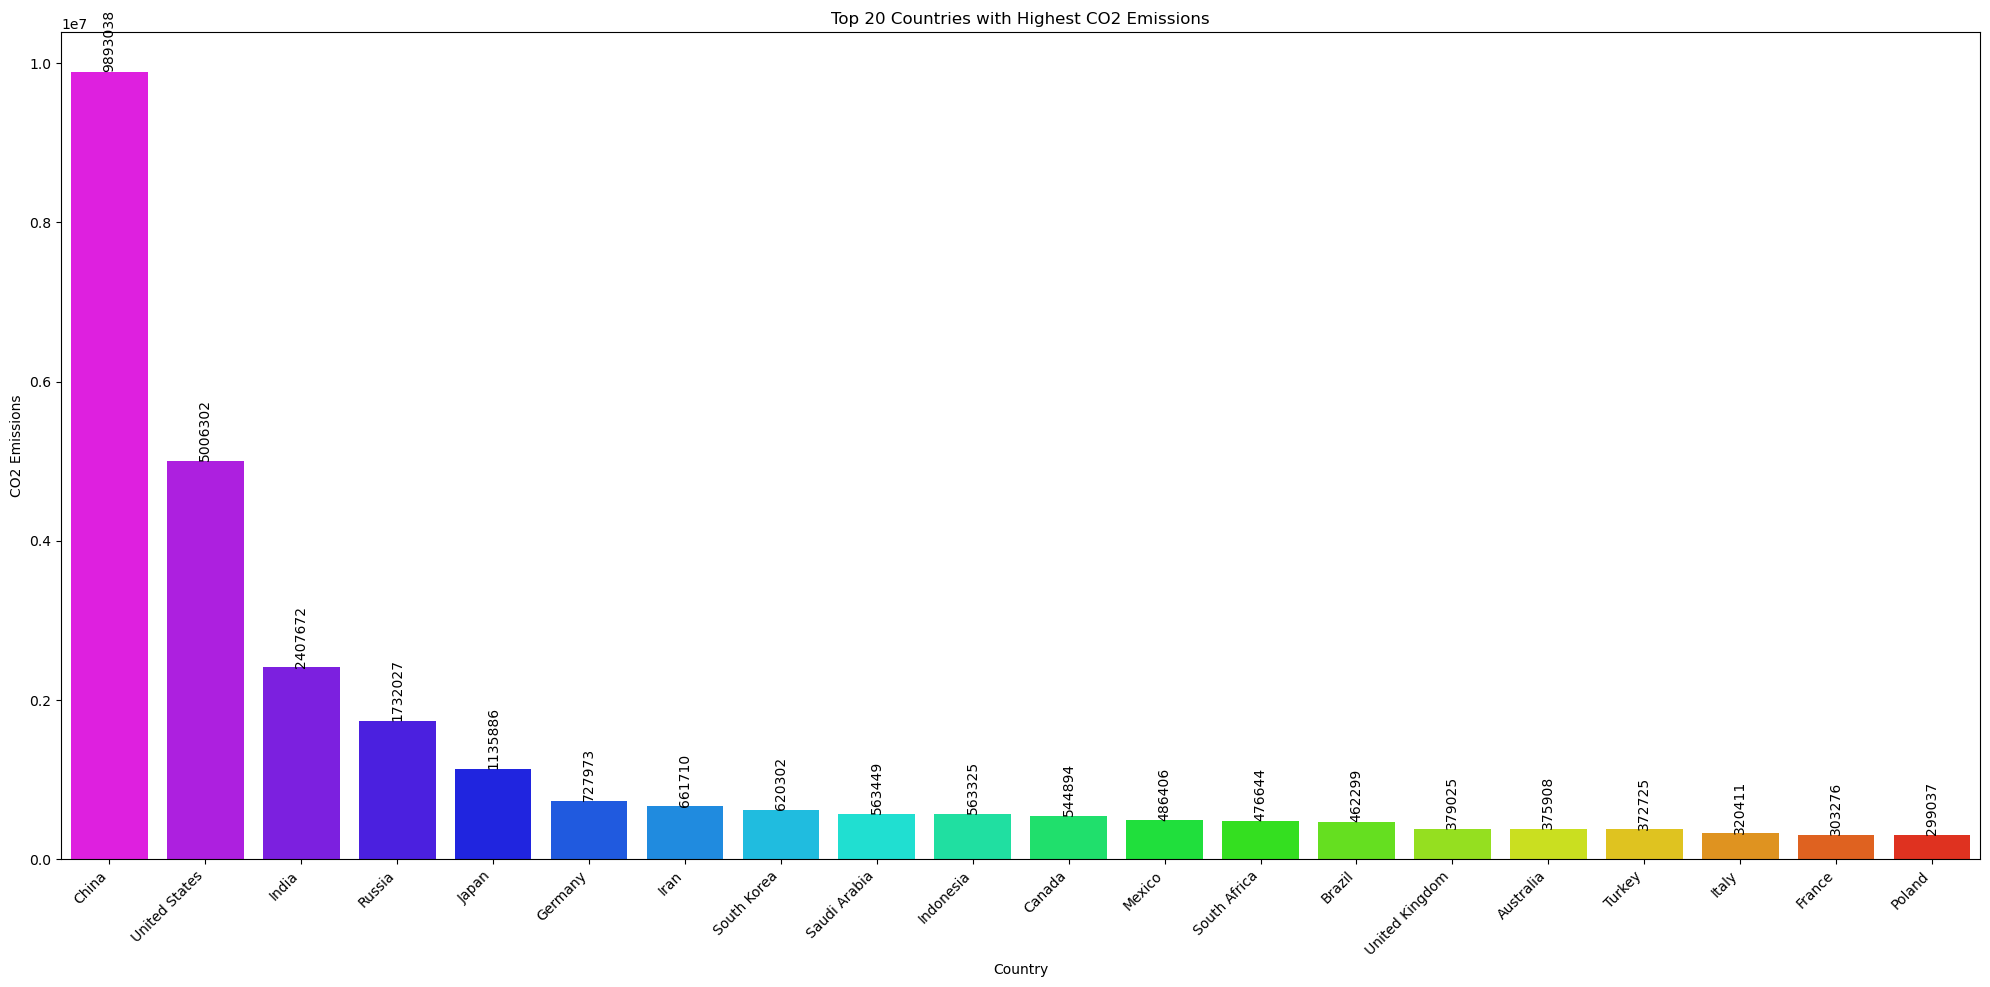

In [181]:
top_co2_emissions_countries = df.sort_values(by='Co2_Emissions(tons)', ascending=False).head(20)

sns.barplot(data=top_co2_emissions_countries, x='Country', y='Co2_Emissions(tons)', palette='gist_rainbow_r')
plt.title('Top 20 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45, ha='right')

for index , value in enumerate(top_co2_emissions_countries['Co2_Emissions(tons)']):
    # plt.text(index, value, f'{value:.0f}', ha = 'center',va = 'bottom', fontsize = 10, rotation = 45)
    plt.text(index, value,f'{value:.0f}',ha = 'center',va = 'bottom', fontsize = 10, rotation = 90)
plt.tight_layout()
plt.show()

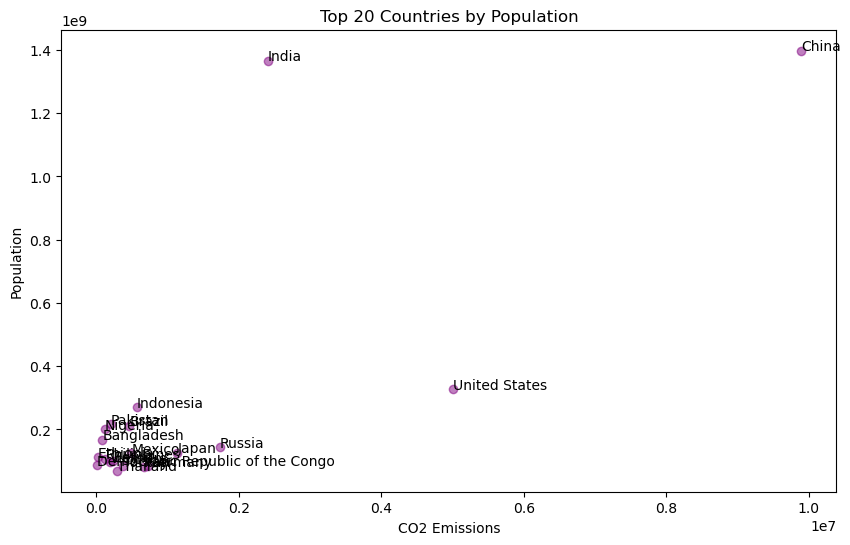

In [183]:
sorted_pop = df.sort_values(by='Population', ascending=False)

top_20 = sorted_pop.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['Population'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['Population'].iloc[i]))

plt.xlabel('CO2 Emissions')
plt.ylabel('Population')
plt.title('Top 20 Countries by Population')
plt.show()

Insights:
For top 20 countries by population, most are the more population, the more emissions detected. With outliers which are the U.S. having high emissions with relatively low population and India having low emissions and high population.

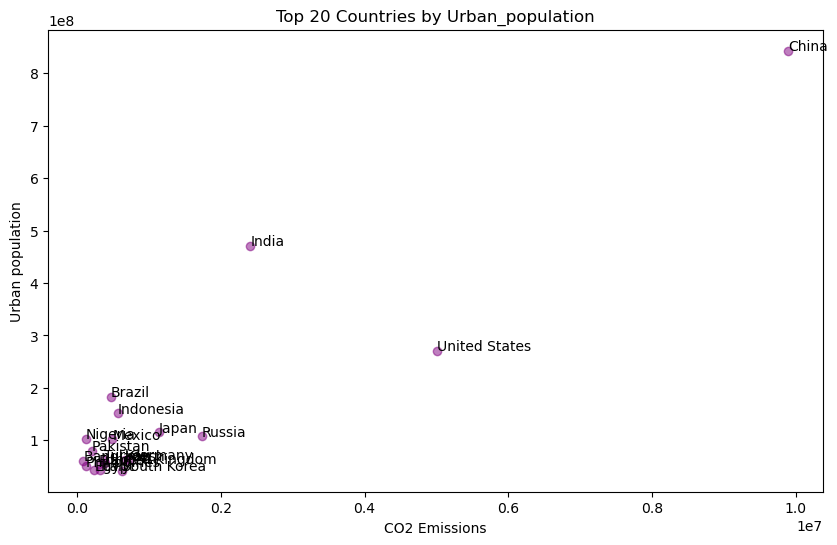

In [53]:
sorted_upop = df.sort_values(by='Urban_population', ascending=False)

top_20 = sorted_upop.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['Urban_population'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['Urban_population'].iloc[i]))

plt.xlabel('CO2 Emissions')
plt.ylabel('Urban population')
plt.title('Top 20 Countries by Urban_population')
plt.show()

Insights:
Sorted by top 20 countries by urban population, although most remain, India has lowered significantly, this represents that urban and rural areas are contributing to Co2 emissions, whereas other countries, most are contributed by urban populations.

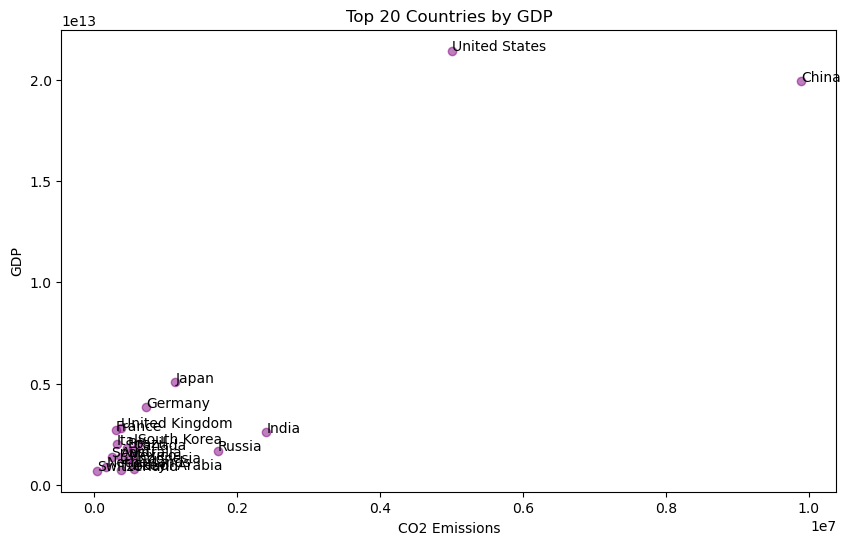

In [193]:
sorted_gdp = df.sort_values(by='GDP', ascending=False)

top_20 = sorted_gdp.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['GDP'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['GDP'].iloc[i]))

plt.xlabel('CO2 Emissions')
plt.ylabel('GDP')
plt.title('Top 20 Countries by GDP')
plt.show()

Insights:
While China remains as high Co2 Emissions, population and GDP. The U.S. are relatively conserve about their co2 emissions to their GDP, which means their co2 emissions are not mainly from GDP but other factors.

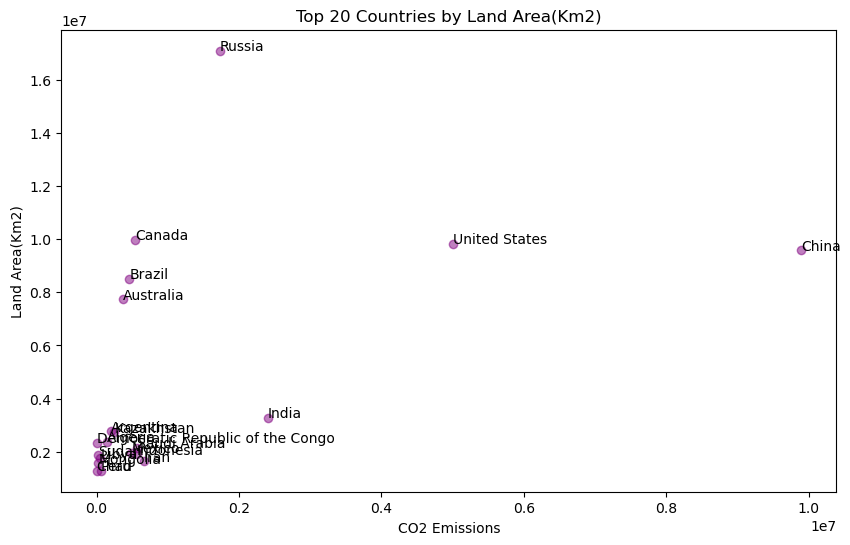

In [184]:
sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)

top_20 = sorted_df.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['Land Area(Km2)'], color='purple',alpha=0.5)
for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['Land Area(Km2)'].iloc[i]))
plt.xlabel('CO2 Emissions')
plt.ylabel('Land Area(Km2)')
plt.title('Top 20 Countries by Land Area(Km2)')
plt.show()

Insights:
This chart shows that land area does not have strong positive correlation with co2 emissions. The bigger countries tend to have lower emissions such as Russia and Canada.

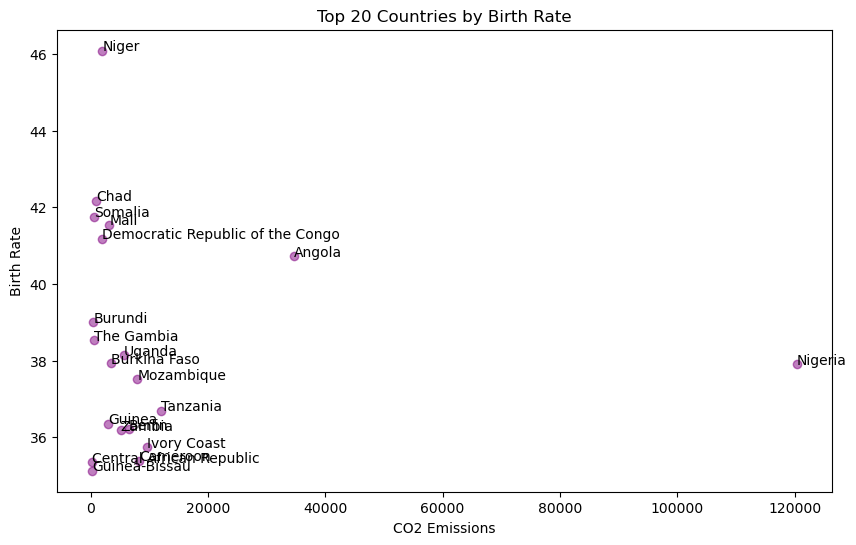

In [48]:
sorted_pop = df.sort_values(by='Birth Rate', ascending=False)

top_20 = sorted_pop.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['Birth Rate'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['Birth Rate'].iloc[i]))

plt.xlabel('CO2 Emissions')
plt.ylabel('Birth Rate')
plt.title('Top 20 Countries by Birth Rate')
plt.show()

Insights:
This chart does not have a clear correlation between co2 emissions and birth rate. As birth rate are high and in the lows, they both are in lower end of co2 emissions.

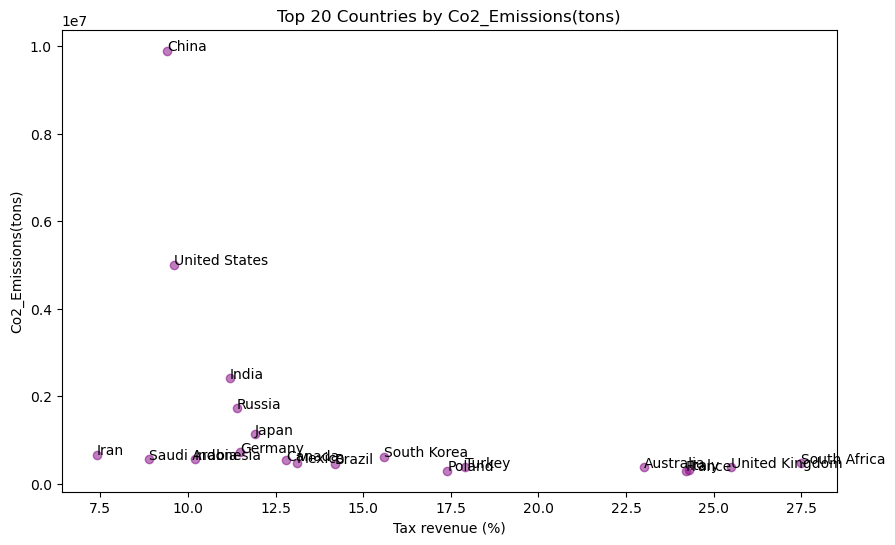

In [54]:
sorted_forest = df.sort_values(by='Co2_Emissions(tons)', ascending=False)

top_20 = sorted_forest.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Tax revenue (%)'], top_20['Co2_Emissions(tons)'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Tax revenue (%)'].iloc[i], top_20['Co2_Emissions(tons)'].iloc[i]))

plt.xlabel('Tax revenue (%)')
plt.ylabel('Co2_Emissions(tons)')
plt.title('Top 20 Countries by Co2_Emissions(tons)')
plt.show()

Insights:
By comparing co2 emissions to tax revenue, we tend to see there is a mediocre negative correlation. As countries are higher in tax revenue, the co2 emissions tend to be lower.

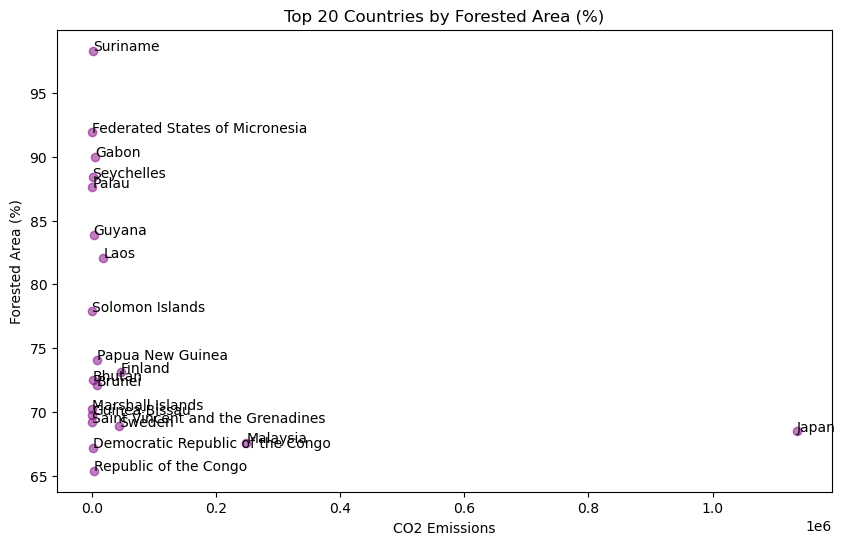

In [43]:
sorted_forest = df.sort_values(by='Forested Area (%)', ascending=False)

top_20 = sorted_forest.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Co2_Emissions(tons)'], top_20['Forested Area (%)'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Co2_Emissions(tons)'].iloc[i], top_20['Forested Area (%)'].iloc[i]))

plt.xlabel('CO2 Emissions')
plt.ylabel('Forested Area (%)')
plt.title('Top 20 Countries by Forested Area (%)')
plt.show()

Insights:
Similar to birth rate, there are no strong correlation here with the exception of Japan having large forested areas and high co2 emissions as an outlier.

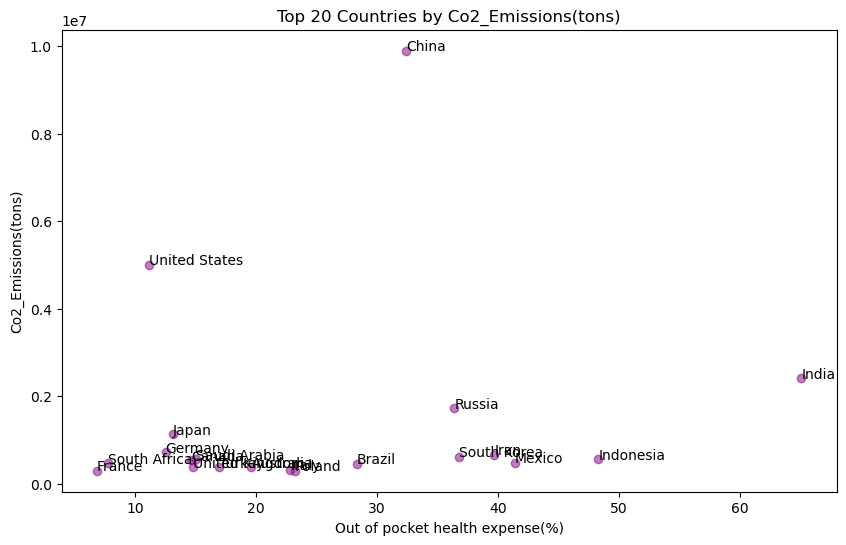

In [199]:
sorted_co = df.sort_values(by='Co2_Emissions(tons)', ascending=False)

top_20 = sorted_co.head(20)

plt.figure(figsize=(10, 6))
plt.scatter(top_20['Out of pocket health expense(%)'], top_20['Co2_Emissions(tons)'], color='purple',alpha=0.5)

for i, txt in enumerate(top_20['Country']):
    plt.annotate(txt, (top_20['Out of pocket health expense(%)'].iloc[i], top_20['Co2_Emissions(tons)'].iloc[i]))

plt.xlabel('Out of pocket health expense(%)')
plt.ylabel('Co2_Emissions(tons)')
plt.title('Top 20 Countries by Co2_Emissions(tons)')
plt.show()

Insights:
This chart shows that health expenses spent by individual on their own is not affected by co2 emissions even with over 60% expenses in India, the co2 emissions are not high.

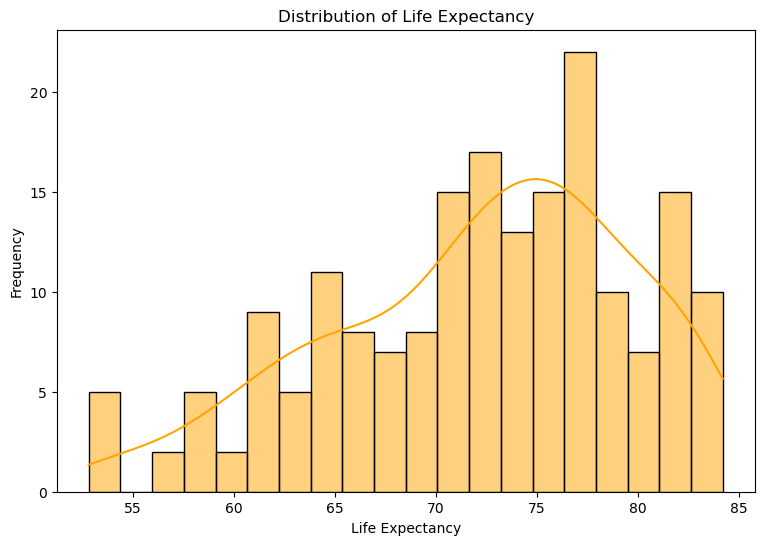

In [87]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Life expectancy(years)', bins=20, kde=True, color='Orange')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

Insights:
Other than co2 emissions, we find the life expectancy on average is around 62~84 years old no matter of other factors.

In [44]:
# Descriptive plot of individual countries
fig = px.scatter(
    df,
    x='Country',
    y='Life expectancy(years)',  
    text='Life expectancy(years)', 
    title='Life Expectancy in Each Country',
    labels={'Life expectancy(years)': 'Life Expectancy (years)'}
)

fig.update_traces(
    marker=dict(size=12, opacity=0.7),
    textfont=dict(size=10),
    textposition='bottom center'
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Life expectancy(years)',
    hovermode='closest'
)

fig.show()

In [45]:
fig = px.scatter(
    df,
    x='Country',
    y='Co2_Emissions(tons)',  
    text='Co2_Emissions(tons)', 
    title='Co2_Emissions in Each Country',
    labels={'Co2_Emissions(tons)': 'Co2_Emissions(tons)'}
)

fig.update_traces(
    marker=dict(size=12, opacity=0.7),
    textfont=dict(size=10),
    textposition='bottom center'
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Co2_Emissions(tons)',
    hovermode='closest'
)

fig.show()

In [46]:
fig = px.scatter(
    df,
    x='Country',
    y='Birth Rate',  
    text='Birth Rate', 
    title='Birth Rate in Each Country',
    labels={'Birth Rate': 'Birth Rate'}
)

fig.update_traces(
    marker=dict(size=12, opacity=0.7),
    textfont=dict(size=10),
    textposition='bottom center'
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Birth Rate',
    hovermode='closest'
)

fig.show()

Conclusion:

The most classic example of Co2-Emissions would be China, having high GDP and population and around 1/3 Co2 Emissions around the globe as provided by IEA.

The U.S. serves as an indicator of high GDP and Emissions but relatively middle of the pack in population which means there are correlation of GDP and emissions.

India serves as an indicator of high population but low in Emissions and GDP which means population is not a strong factor of Co2 Emissions.

Russia and Canada represented that the size of the country does not contribute to the influence of high Co2 Emissions.

Most factors does not draw a clear conclusion as to why Co2 Emissions may be impacted, but the analytic points below are drawn from the charts:

- In India, urban and rural population are responsible for overall Co2 Emissions.
- We can inspect how India distributes co2 emissions to see why their high population does not affect co2 emissions.
- Countries with lower taxes may have higher co2 emissions in general.
- Forested area and agricultural area does not have correlation with Co2 Emissions.
- Life expectancy is generally in the range of 60-85 years no matter the birth rate or fertility.

According to IEA, although China contributed 35% of global co2 emissions, China also have 60% positive impact on developing electric and hybrid vehicles. We can make references with countries that are high in other factors and low in co2 emissions to see their distributions of co2 emissions is like and draw to ideas that may lower Co2 Emissions.

In [57]:
git clone 'https://github.com/EnlunaT/Co2-EDA.git'

SyntaxError: invalid syntax (777019641.py, line 1)